In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_excel('Telco-Customer-Churn.xlsx')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 1) Compare churn count with respect to gender. 


<AxesSubplot:xlabel='gender', ylabel='count'>

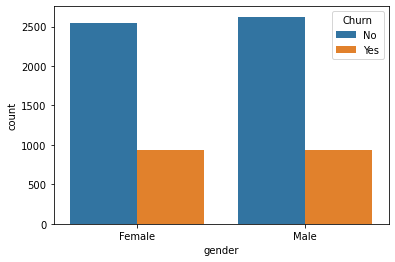

In [4]:
sns.countplot(x='gender',hue='Churn', data=data)

# 2) Find out how many female senior citizens there in the dataset 

In [5]:
data[data.SeniorCitizen==1].gender.value_counts()

Male      574
Female    568
Name: gender, dtype: int64

Text(0.5, 1.0, 'Female Senior citizen')

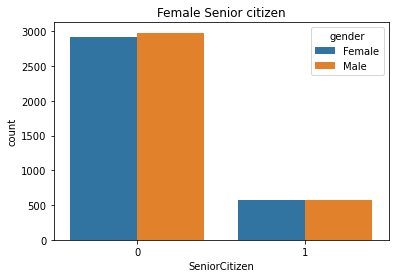

In [17]:
#from the samples found out that 568 female senior citizens are there.
sns.countplot(data=data,x='SeniorCitizen',hue='gender')
plt.title('Female Senior citizen')

# 3) Compare 'tenure' with 'Total Charges

Text(0, 0.5, 'TotalCharges')

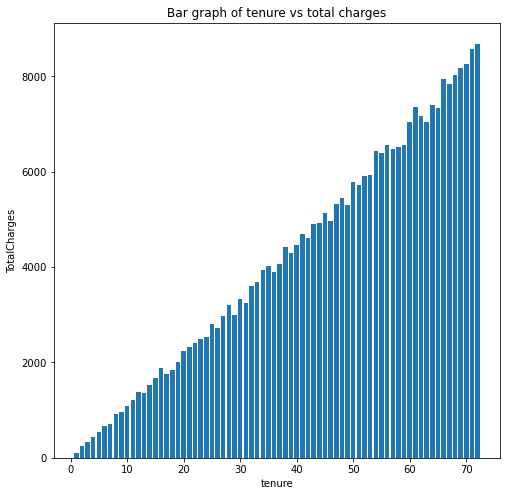

In [11]:
data["TotalCharges"]=pd.to_numeric(data['TotalCharges'],errors='coerce')
data['tenure']=pd.to_numeric(data['tenure'],errors='coerce')
plt.figure(figsize=(8,8))
x=data['tenure']
y=data['TotalCharges']
plt.bar(x,y)
plt.title('Bar graph of tenure vs total charges')
plt.xlabel('tenure')
plt.ylabel('TotalCharges')

# 4) Find out which contract preffered by the senior citizen

In [46]:
#Senior citizen preffered three types of contracts. but mostly month-to-month contract
data[data.SeniorCitizen==1].Contract.value_counts()

Month-to-month    807
One year          190
Two year          145
Name: Contract, dtype: int64

Text(0.5, 1.0, 'Contract by Senior citizen')

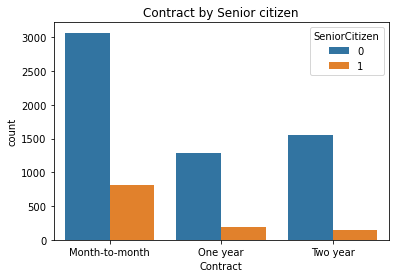

In [15]:
sns.countplot(data=data,x='Contract',hue='SeniorCitizen')
plt.title('Contract by Senior citizen')

# 5) Comment your finds on Payment Method?

In [47]:
#Payment methods used by customers.
#catogorized by male and female.
data.groupby('gender').PaymentMethod.value_counts()

gender  PaymentMethod            
Female  Electronic check             1170
        Bank transfer (automatic)     788
        Mailed check                  778
        Credit card (automatic)       752
Male    Electronic check             1195
        Mailed check                  834
        Credit card (automatic)       770
        Bank transfer (automatic)     756
Name: PaymentMethod, dtype: int64

In [12]:
#most customers are comfortable with electronic check but to soon it will changes to automatic payments like Bank transfer or Credit card.

Text(0.5, 1.0, 'Payment methods vs Customers')

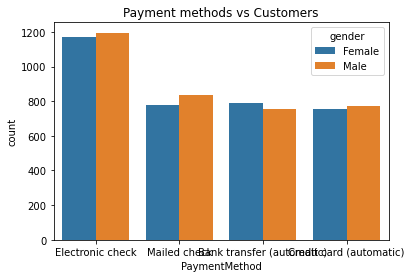

In [16]:
sns.countplot(data=data,x='PaymentMethod',hue='gender')
plt.title('Payment methods vs Customers')